In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# Lists for save accuracy of our Logistic Model and Support Vector Machine Model.
acc = []
models = []

In [32]:
# Reading a CSV file
crop_df = pd.read_csv('Crop_recommendation.csv')

In [33]:
# Make new column no_label to give numbers to our actual dependent variable.
crop_df['no_label'] = pd.Categorical(crop_df.label).codes
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,no_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [34]:
# Check data types of columns
crop_df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
no_label          int8
dtype: object

In [35]:
# Change Datatype of no_label from int8 to int 64
crop_df['no_label'] = crop_df.no_label.astype('int64')
crop_df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'no_label'],
      dtype='object')

In [36]:
# Make dictionary of labels and its asociative number.
l = dict(zip(crop_df.no_label.unique(),crop_df.label.unique()))

In [37]:
# Create independent and dependent variables

# Independent Variable
features = crop_df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

# Dependent Variable
target = crop_df.no_label

In [38]:
# import train_test_split model from sklearn
from sklearn.model_selection import train_test_split

In [39]:
# To get a good prediction, divide the data into training and testing data, it is because as the name suggests you will train few data points and test few data points, and keep on doing that unless you get good results.

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=2)

In [40]:
# import logistic regression classifier
from sklearn.linear_model import LogisticRegression

In [41]:
# This is one of the most important because this is where we apply the Logistic regression algorithm, to do this we have to feed the trained the tested values to the actual algorithm, by doing so we can predict the subscribers. To do this follow the below code:

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\SHUBHAM\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
#Here in the above code, we are calling the Logistic Regression function and then we are trying to fit the model by-passing the trained values.

predicted_val = log_reg.predict(X_test)

In [43]:
# Now we create our model and train it. So we can check accuracy of our Logistic Regression Model
from sklearn import metrics

In [44]:
# Code for check accuracy
x = metrics.accuracy_score(y_test, predicted_val)
acc.append(x)
models.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

Logistic Regression's Accuracy is:  0.9522727272727273


In [45]:
# Check prediction with random observations.
print('Predicted Crop Type is :',l[log_reg.predict([['90','42'	,'43','20.879744',	'82.002744',	'6.502985','202.935536']])[0]])

Predicted Crop Type is : rice


C:\Users\SHUBHAM\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\SHUBHAM\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [46]:
# Above we create logistic regression model and check its accuracy.Below we create another model Support Vector Machine

# Classification Using SVM
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [47]:
#Here in the above code, we are calling the Logistic Regression function and then we are trying to fit the model by-passing the trained values.

predicted_val2 = model.predict(X_test)

In [48]:
# Check accuracy of our model and aapend it int our accuracy and models list
y = metrics.accuracy_score(y_test,predicted_val2)
acc.append(y)
models.append('Support Vector Machine')
print("Support Vector Machine's Accuracy is: ", y)

Support Vector Machine's Accuracy is:  0.9772727272727273


In [49]:
# List contain accuracy of our models
acc

[0.9522727272727273, 0.9772727272727273]

In [50]:
# List contain Names of our models we used.
models

['Logistic Regression', 'Support Vector Machine']

In [51]:
# Merge both liss into dictonary and name itas acc_dict
acc_dict = {
    'Models':models,
    'Accuracy':acc
}

In [52]:
# Create Dataframe of accuarcy of models and their respective names. So we can see clearly which models has more accuracy
acc_df = pd.DataFrame(acc_dict)
acc_df

,Models,Accuracy
0,Logistic Regression,0.952273
1,Support Vector Machine,0.977273


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


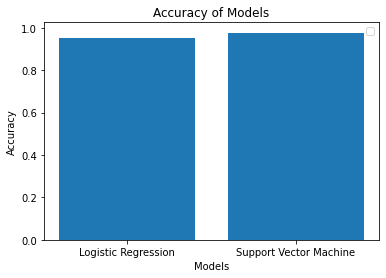

In [53]:
# Plot of models and its accuracy
plt.bar(acc_df['Models'],acc_df['Accuracy'])
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.title('Accuracy of Models')
plt.legend();
# Here we can observed that our SVM models has slightly higher accuracy than Logistic Regression model

In [54]:
# Saving SVM model into Pickle file to use in Our GUI
import pickle
with open('croppred.sav','wb') as f:
    pickle.dump(model,f)